In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dataset = pd.read_csv('transaksi.csv',on_bad_lines='skip', delimiter=';')
dataset

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,1173,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,352,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,9,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,173,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,34,United Kingdom
...,...,...,...,...,...,...,...,...
195,-1,6125031,Mon Aug 27 06:22:00 IST 2018,998886,TEA TIME PARTY BUNTING,3,1145,United Kingdom
196,305067,6218432,Wed Nov 14 08:37:00 IST 2018,460362,UNION STRIPE WITH FRINGE HAMMOCK,3,1098,United Kingdom
197,382746,6301702,Mon Jan 07 09:36:00 IST 2019,489342,KNEELING MAT HOUSEWORK DESIGN,36,228,United Kingdom
198,355005,6352775,Fri Feb 01 09:37:00 IST 2019,494970,TRADITIONAL PICK UP STICKS GAME,60,173,United Kingdom


In [25]:
dataset["CostPerItem"] = pd.factorize(dataset.CostPerItem)[0]

In [26]:
dataset['CostPerItem']

0       0
1       1
2       2
3       3
4       4
       ..
195    17
196    54
197    27
198     3
199     5
Name: CostPerItem, Length: 200, dtype: int64

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   UserId                  200 non-null    int64 
 1   TransactionId           200 non-null    int64 
 2   TransactionTime         200 non-null    object
 3   ItemCode                200 non-null    int64 
 4   ItemDescription         200 non-null    object
 5   NumberOfItemsPurchased  200 non-null    int64 
 6   CostPerItem             200 non-null    int64 
 7   Country                 200 non-null    object
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [30]:
X = dataset.iloc[:, [5, 6]].values
X

array([[   6,    0],
       [   3,    1],
       [  72,    2],
       [   3,    3],
       [   3,    4],
       [  12,    1],
       [   9,    5],
       [ 120,    6],
       [  36,    7],
       [  36,    8],
       [  36,    3],
       [   3,    3],
       [   3,    9],
       [  60,   10],
       [  12,    5],
       [  24,   11],
       [  36,   12],
       [   3,   13],
       [  36,    3],
       [  72,   14],
       [ 150,    1],
       [  72,   15],
       [   6,   16],
       [  30,    4],
       [   3,   17],
       [   3,   18],
       [  15,   19],
       [  36,    5],
       [   3,   10],
       [   6,    1],
       [   6,   20],
       [   6,   19],
       [  18,   21],
       [   9,   19],
       [  12,    5],
       [  30,    7],
       [   3,   22],
       [  12,   18],
       [   9,   23],
       [   6,    7],
       [  15,   19],
       [   3,   24],
       [  72,   25],
       [   3,   11],
       [  72,   25],
       [   3,   18],
       [   6,   26],
       [  90,

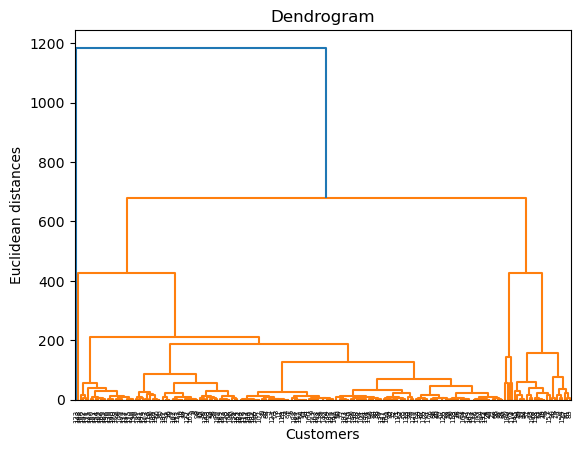

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

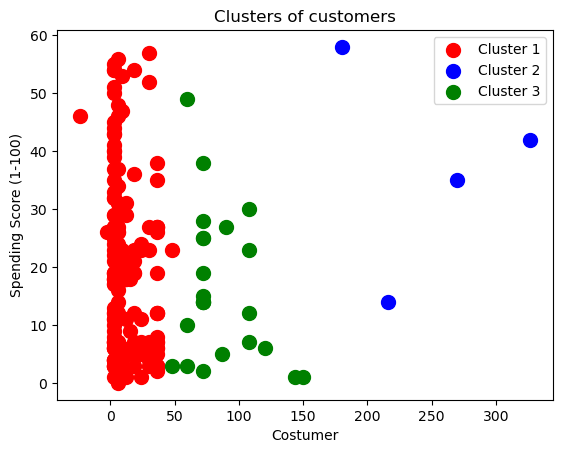

In [34]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Costumer')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()